# Mo hinh phan loai khach hang RFM bang phan cum K-Means

In [101]:
#import thu vien
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
# Load data
df = pd.read_excel('data.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [103]:
df.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [104]:
# loai bo nan
df_not_nan = df[df['CustomerID'].notna()]
#df_not_nan = df_not_nan.sample(10000, random_state= 42)
df_not_nan.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


# Tinh RFM

In [105]:
# Tinh RFM
# Tinh R - Recency
df_not_nan['InvoiceDate'] = pd.to_datetime(df_not_nan['InvoiceDate'])
df_not_nan['InvoiceDate'].describe()

C:\Users\tranc\AppData\Local\Temp\ipykernel_18212\4119194311.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_nan['InvoiceDate'] = pd.to_datetime(df_not_nan['InvoiceDate'])
C:\Users\tranc\AppData\Local\Temp\ipykernel_18212\4119194311.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_not_nan['InvoiceDate'].describe()


count                  406829
unique                  20460
top       2011-11-14 15:27:00
freq                      543
first     2010-12-01 08:26:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

In [106]:
# Lay ngay lon nhat +1
import datetime
current_date = max(df_not_nan['InvoiceDate']) + datetime.timedelta(days= 1)

# Tinh M - MoneytaryValue
df_not_nan['TotalPay'] = df_not_nan['Quantity'] * df_not_nan['UnitPrice']


C:\Users\tranc\AppData\Local\Temp\ipykernel_18212\219345179.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_nan['TotalPay'] = df_not_nan['Quantity'] * df_not_nan['UnitPrice']


## Tao tap du lieu moi group theo khach hang

In [107]:
# Group by CustomerID tinh R,F,M
df_customer = df_not_nan.groupby(['CustomerID']).agg(
    {
        # Tinh R
        'InvoiceDate': lambda x: (current_date - x.max()).days,
        # Tinh F
        'InvoiceNo': 'count',
        # Tinh M
        'TotalPay': 'sum'
    }
)

In [108]:
df_customer.head()

,InvoiceDate,InvoiceNo,TotalPay
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [109]:
df_customer.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency','TotalPay':'MonetaryValue'}, inplace =True)
df_customer.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


## Kiem tra phan phoi cua du lieu

C:\Users\tranc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tranc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tranc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\loc

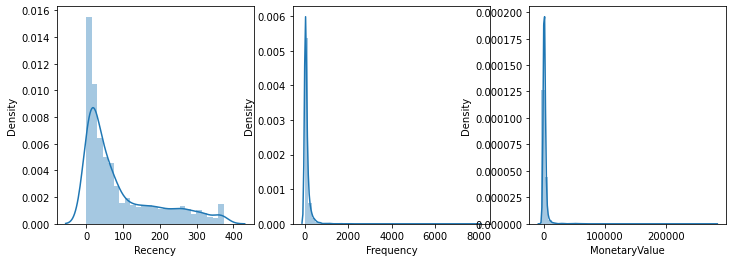

In [110]:
# Ve phan phoi kiem tra
fig, ax = plt.subplots(1, 3, figsize=(12,4))
sns.distplot(df_customer['Recency'], ax = ax[0])
sns.distplot(df_customer['Frequency'], ax = ax[1])
sns.distplot(df_customer['MonetaryValue'], ax = ax[2])
plt.show()

# Transfrom du lieu

In [111]:
# Ham transform dư lieu
from scipy import stats
def analyze_skewness(x):
    fig,ax=plt.subplots(2,2,figsize=(5,5))
    sns.distplot(df_customer[x],ax=ax[0,0])
    sns.distplot(np.log(df_customer[x]),ax=ax[0,1])
    sns.distplot(np.sqrt(df_customer[x]),ax=ax[1,0])
    sns.distplot(stats.boxcox(df_customer[x])[0],ax = ax[1,1])
    plt.tight_layout()
    plt.show()
    print(df_customer[x].skew().round(2))
    print(np.log(df_customer[x]).skew().round(2))
    print(np.sqrt(df_customer[x]).skew().round(2))
    print(pd.Series(stats.boxcox(df_customer[x])[0]).skew().round(2))

C:\Users\tranc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tranc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tranc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\loc

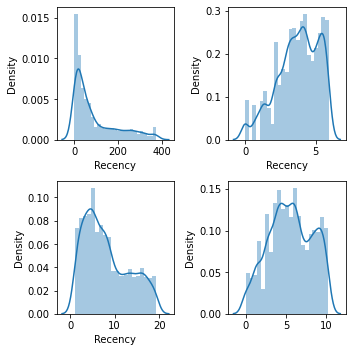

1.25
-0.53
0.59
-0.07


In [112]:
# So sach cac mo hinh transform cho thuoc tinh
analyze_skewness('Recency')

### Transform bang boxcox cho ket qua tot nha ~ 0 => lua chon boxcox

## Transform bang phuong phap boxcox

In [113]:
df_customer_t = pd.DataFrame()
df_customer_t['Recency'] = stats.boxcox(df_customer['Recency'])[0]
df_customer_t['Frequency'] = stats.boxcox(df_customer['Frequency'])[0]
df_customer_t['MonetaryValue'] = pd.Series(np.cbrt(df_customer['MonetaryValue'])).values

In [114]:
df_customer_t.head()

,Recency,Frequency,MonetaryValue
0,9.876619,0.707055,0.000000
1,0.735846,6.060363,16.273929
2,6.384920,3.794006,12.158183
3,3.826255,4.862047,12.068017
4,9.741979,3.075409,6.941001


C:\Users\tranc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tranc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tranc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\loc

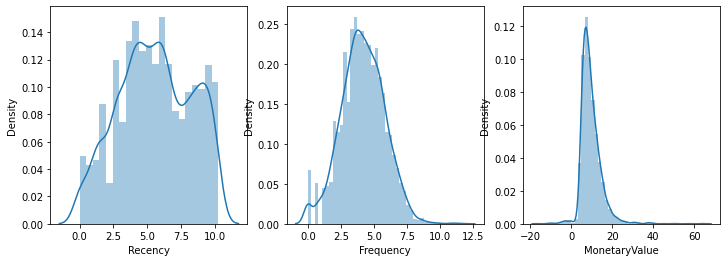

In [115]:
# Ve phan phoi kiem tra
fig, ax = plt.subplots(1, 3, figsize=(12,4))
sns.distplot(df_customer_t['Recency'], ax = ax[0])
sns.distplot(df_customer_t['Frequency'], ax = ax[1])
sns.distplot(df_customer_t['MonetaryValue'], ax = ax[2])
plt.show()

## Scale du lieu

In [116]:
# Tien hanh scale du lieu phuong phap standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_customer_t[["Recency", "Frequency", "MonetaryValue"]])
df_customer_t[["Recency", "Frequency", "MonetaryValue"]] = scaler.transform(df_customer_t[["Recency", "Frequency", "MonetaryValue"]])
df_customer_t = scaler.transform(df_customer_t)

In [117]:
df_customer_t = pd.DataFrame(df_customer_t, columns={'Recency', 'Frequency', 'MonetaryValue'})

In [118]:
df_customer_t.head()

,MonetaryValue,Recency,Frequency
0,-1.471166,-3.800763,-2.310942
1,-2.742359,-1.828390,-1.659424
2,-1.956751,-2.663407,-1.824196
3,-2.312580,-2.269898,-1.827806
4,-1.489890,-2.928166,-2.033063


# Tien hanh phan loai bang mo hinh K-Means

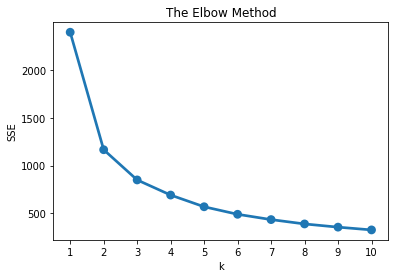

In [119]:
# Dua tap du lieu vao mo hinh phan loai
# Chon so cum bang Elbow
from random import random, seed
from sklearn.cluster import KMeans

sse ={}
for k in range (1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_customer_t)
    sse[k] = kmeans.inertia_
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y = list(sse.values()))
plt.show()

In [120]:
# Goi model va phan cum
model = KMeans(n_clusters=3, random_state= 42)
model.fit(df_customer_t)

KMeans(n_clusters=3, random_state=42)

In [121]:
df_customer['CustomerType'] = model.labels_
df_customer.head()

,Recency,Frequency,MonetaryValue,CustomerType
CustomerID,,,,
12346.0,326,2,0.00,1
12347.0,2,182,4310.00,0
12348.0,75,31,1797.24,2
12349.0,19,73,1757.55,2
12350.0,310,17,334.40,1


# Tinh R,F,M trung binh cua tung nhom khach hang

In [122]:
# Tinh toan theo tung loai khach hang
df_customer_summary = df_customer.groupby(['CustomerType']).agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':'mean'
    }
)

In [123]:
df_customer_summary

,Recency,Frequency,MonetaryValue
CustomerType,,,
0,21.589317,258.387916,5368.803345
1,174.293251,11.029480,333.575067
2,78.882535,50.248841,895.885694
